In [1]:
#training images
import scriptrunner as sr
import os


In [2]:
character_name="Kunal"
images_folder="currTemp/Kunal/"
output_folder="currTemp/output/"



In [3]:
sr.addCharacter(character_name,images_folder,output_folder,pretrained=False,num_steps=500)

/home/slv/anaconda3/envs/vidgen/bin/leap_textual_inversion:4: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  __import__('pkg_resources').require('leap-sd==0.0.2')
2023-11-26 14:21:06.469216: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-26 14:21:06.492651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-26 14:21:06.864458: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
11/26/2023 14:21:08 - IN

Successfully boosted embed to tensor([ 0.0007, -0.0033, -0.0014,  ..., -0.0014, -0.0020, -0.0006])


11/26/2023 14:21:14 - INFO - __main__ - ***** Running training *****
11/26/2023 14:21:14 - INFO - __main__ -   Num examples = 1600
11/26/2023 14:21:14 - INFO - __main__ -   Num Epochs = 2
11/26/2023 14:21:14 - INFO - __main__ -   Instantaneous batch size per device = 1
11/26/2023 14:21:14 - INFO - __main__ -   Total train batch size (w. parallel, distributed & accumulation) = 4
11/26/2023 14:21:14 - INFO - __main__ -   Gradient Accumulation steps = 4
11/26/2023 14:21:14 - INFO - __main__ -   Total optimization steps = 500
Steps: 100%|██████████| 500/500 [22:59<00:00,  2.76s/it, loss=0.226, lr=0.004]11/26/2023 14:44:14 - INFO - __main__ - Saving embeddings
11/26/2023 14:44:14 - INFO - accelerate.accelerator - Saving current state to currTemp/output/checkpoint-500
11/26/2023 14:44:15 - INFO - accelerate.checkpointing - Model weights saved in currTemp/output/checkpoint-500/pytorch_model.bin
11/26/2023 14:44:15 - INFO - accelerate.checkpointing - Optimizer state saved in currTemp/output/ch

currTemp/output//learned_embeds.bin


'currTemp/output/'

In [5]:
import torch

def load_learned_embed_in_clip(learned_embeds_path, text_encoder, tokenizer):
    loaded_learned_embeds = torch.load(learned_embeds_path, map_location="cpu")

    # separate token and the embeds
    token = list(loaded_learned_embeds.keys())[0]
    embeds = loaded_learned_embeds[token]

    # cast to dtype of text_encoder
    dtype = text_encoder.get_input_embeddings().weight.dtype
    embeds = embeds.to(dtype)

    # add the token in tokenizer
    num_added_tokens = tokenizer.add_tokens(token)
    if num_added_tokens == 0:
        print(f"Warning: Token {token} already exists! Will replace this token in-memory!")

    # resize the token embeddings
    text_encoder.resize_token_embeddings(len(tokenizer))

    # get the id for the token and assign the embeds
    token_id = tokenizer.convert_tokens_to_ids(token)
    text_encoder.get_input_embeddings().weight.data[token_id] = embeds

2023-11-26 10:01:00.847372: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-26 10:01:00.871430: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-26 10:01:01.247409: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/200 [00:00<?, ?it/s]

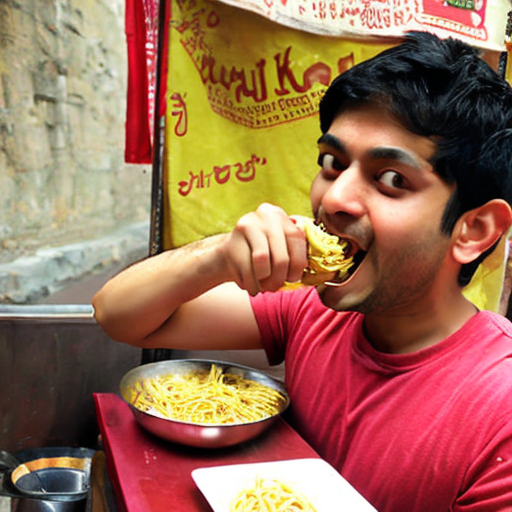

In [6]:
from diffusers import AutoencoderKL, DDPMScheduler, StableDiffusionPipeline, UNet2DConditionModel

pipeline = StableDiffusionPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1-base"      
)
# If GPU
pipeline = pipeline.to('cuda')
embed_path = "currTemp/output/learned_embeds.bin"
load_learned_embed_in_clip(embed_path, pipeline.text_encoder, pipeline.tokenizer)
torch.manual_seed(80085)
preview = pipeline(f"<Kunal> eating noodles", width = 512, height = 512, guidance_scale=9, num_inference_steps=200).images[0]
preview